In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

%matplotlib inline

In [4]:
data = pd.read_csv('data_bank_models.csv', sep = ',')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit
0,56,3,2,2,0,0,0,1,5,1,4.350000,1,999,0,0,-36.4,4.857,0
1,57,7,2,3,1,0,0,1,5,1,2.483333,1,999,0,0,-36.4,4.857,0
2,37,7,2,3,0,2,0,1,5,1,3.766667,1,999,0,0,-36.4,4.857,0
3,40,0,2,2,0,0,0,1,5,1,2.516667,1,999,0,0,-36.4,4.857,0
4,56,7,2,3,0,0,2,1,5,1,5.116667,1,999,0,0,-36.4,4.857,0


In [131]:
data.deposit.value_counts()

0    36544
1     4640
Name: deposit, dtype: int64

In [130]:
data[(data.loan == 2) & (data.housing == 2)].count()

age                3691
job                3691
marital            3691
education          3691
default            3691
housing            3691
loan               3691
contact            3691
month              3691
day_of_week        3691
duration           3691
campaign           3691
pdays              3691
previous           3691
poutcome           3691
cons_conf_idx      3691
euribor_3_month    3691
deposit            3691
dtype: int64

In [74]:
data.default.value_counts()

0    32584
1     8597
2        3
Name: default, dtype: int64

In [75]:
data.loan.value_counts()

0    33946
2     6248
1      990
Name: loan, dtype: int64

In [76]:
data.housing.value_counts()

2    21573
0    18621
1      990
Name: housing, dtype: int64

In [4]:
def impute_unknown(x):
    if x == 2:
        x = 0
    return x

In [5]:
##imputing the missing value in housing, loan & default coulmns with '0' - going by majority as they were not correlated with other variables:
data.housing = data.housing.map(impute_unknown)
data.default = data.default.map(impute_unknown)
data.loan = data.loan.map(impute_unknown)

In [79]:
data.housing.unique()

array([0, 1], dtype=int64)

In [80]:
data.housing.value_counts()

0    40194
1      990
Name: housing, dtype: int64

In [83]:
data.loan.value_counts()

0    40194
1      990
Name: loan, dtype: int64

In [84]:
data.default.value_counts()

0    32587
1     8597
Name: default, dtype: int64

In [85]:
data.loan.unique()

array([0, 1], dtype=int64)

In [86]:
data.default.unique()

array([0, 1], dtype=int64)

In [87]:
data.marital.value_counts()

2    24925
1    11568
3     4611
0       80
Name: marital, dtype: int64

In [6]:
def unknown(x):
    if x == 0:
        x = 2
    return x

In [7]:
data.marital = data.marital.map(unknown)

In [90]:
data.marital.value_counts()

2    25005
1    11568
3     4611
Name: marital, dtype: int64

In [6]:
data.education.value_counts()

4    17410
3    15557
2     6468
1     1731
0       18
Name: education, dtype: int64

In [7]:
#function for unknown education
def unknown_edu(x):
    if x == 1:
        x = 4
    return x

In [8]:
#imputung unknown education with the majority class, tertiary(4):
data.education = data.education.map(unknown_edu)

In [9]:
data.education.value_counts()

4    19141
3    15557
2     6468
0       18
Name: education, dtype: int64

In [10]:
data.job.value_counts()

0     10421
1      9252
9      6743
7      3969
4      2923
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: job, dtype: int64

In [11]:
# for unknown job:
def unknown_job(x):
    if x == 11:
        x = 0
    return x

In [12]:
#imputing the unknown value majority class, the admin (0):
data.job = data.job.map(unknown_job)

In [13]:
data.job.value_counts()

0     10751
1      9252
9      6743
7      3969
4      2923
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
Name: job, dtype: int64

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit
0,56,3,2,2,0,0,0,1,5,1,4.350000,1,999,0,0,-36.4,4.857,0
1,57,7,2,3,1,0,0,1,5,1,2.483333,1,999,0,0,-36.4,4.857,0
2,37,7,2,3,0,2,0,1,5,1,3.766667,1,999,0,0,-36.4,4.857,0
3,40,0,2,2,0,0,0,1,5,1,2.516667,1,999,0,0,-36.4,4.857,0
4,56,7,2,3,0,0,2,1,5,1,5.116667,1,999,0,0,-36.4,4.857,0


In [15]:
data.dtypes

age                  int64
job                  int64
marital              int64
education            int64
default              int64
housing              int64
loan                 int64
contact              int64
month                int64
day_of_week          int64
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome             int64
cons_conf_idx      float64
euribor_3_month    float64
deposit              int64
dtype: object

In [16]:
#dropping duration column as though it is a good predictor in saying higher the duration, customer will subscribe for term deposit.
#Since before making the call, we will not know the duration and after the call it is obvious. So dropping it
data.drop(columns = ['duration'], axis = 1, inplace = True)

In [17]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons_conf_idx', 'euribor_3_month', 'deposit'],
      dtype='object')

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41184.0,40.023529,10.421044,17.000,32.000,38.000,47.000,98.000
job,41184.0,3.636655,3.549747,0.000,0.000,2.000,7.000,10.000
marital,41184.0,1.827190,0.608903,0.000,1.000,2.000,2.000,3.000
education,41184.0,3.306405,0.729302,0.000,3.000,3.000,4.000,4.000
default,41184.0,0.208892,0.406701,0.000,0.000,0.000,0.000,2.000
housing,41184.0,1.071678,0.985316,0.000,0.000,2.000,2.000,2.000
loan,41184.0,0.327457,0.723644,0.000,0.000,0.000,0.000,2.000
contact,41184.0,1.634737,0.481510,1.000,1.000,2.000,2.000,2.000
month,41184.0,6.608003,2.041014,3.000,5.000,6.000,8.000,12.000
day_of_week,41184.0,2.979628,1.411497,1.000,2.000,3.000,4.000,5.000


In [19]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit
age,1.000000,-0.011934,0.389734,-0.130095,0.165005,-0.001694,-0.007346,-0.007065,0.077263,-0.018532,0.004468,-0.034381,0.024384,0.026392,0.129366,0.010745,0.030419
job,-0.011934,1.000000,-0.025489,0.170706,-0.044035,0.007426,-0.011503,0.031924,0.047937,-0.000867,-0.007732,-0.025662,0.022134,0.021382,0.044258,-0.012703,0.025462
marital,0.389734,-0.025489,1.000000,-0.103963,0.079490,-0.010517,-0.005758,-0.054543,0.018721,-0.014521,0.007214,0.037930,-0.038668,-0.040395,0.033849,0.092005,-0.046181
education,-0.130095,0.170706,-0.103963,1.000000,-0.196477,0.019649,0.006295,0.103668,0.120333,0.004861,-0.000045,-0.040301,0.032908,0.034683,0.070332,-0.031156,0.049099
default,0.165005,-0.044035,0.079490,-0.196477,1.000000,-0.015794,-0.003805,-0.135233,-0.084354,-0.004303,0.032867,0.080073,-0.102436,-0.108180,0.026514,0.195336,-0.099371
housing,-0.001694,0.007426,-0.010517,0.019649,-0.015794,1.000000,0.044317,0.082208,0.031878,-0.009041,-0.011094,-0.010559,0.021330,0.023758,-0.033891,-0.059324,0.011567
loan,-0.007346,-0.011503,-0.005758,0.006295,-0.003805,0.044317,1.000000,0.008567,-0.004217,0.002371,0.005201,0.000354,-0.001343,-0.000482,-0.012034,0.000114,-0.004924
contact,-0.007065,0.031924,-0.054543,0.103668,-0.135233,0.082208,0.008567,1.000000,0.324342,-0.019595,-0.077410,-0.117980,0.212866,0.226833,-0.251581,-0.399755,0.144788
month,0.077263,0.047937,0.018721,0.120333,-0.084354,0.031878,-0.004217,0.324342,1.000000,-0.006944,-0.030672,-0.079549,0.063739,0.060825,0.264187,0.163364,0.037170
day_of_week,-0.018532,-0.000867,-0.014521,0.004861,-0.004303,-0.009041,0.002371,-0.019595,-0.006944,1.000000,0.015142,0.006772,0.004002,0.003267,-0.000061,-0.005530,0.010040


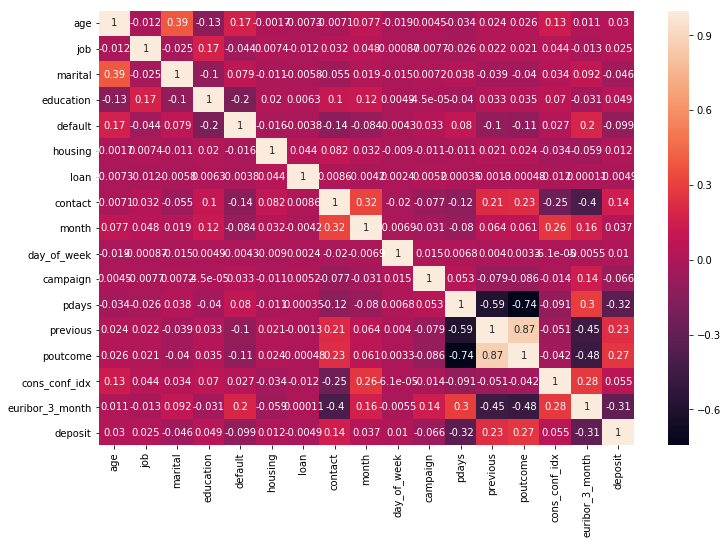

In [20]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)

#### Since poutcome shows high correlation with previous and pdays will drop that for now as predictor and choose other features to build model

In [57]:
c = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'cons_conf_idx',
       'euribor_3_month']

In [21]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons_conf_idx', 'euribor_3_month', 'deposit'],
      dtype='object')

In [58]:
X = data[c]

In [59]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'cons_conf_idx', 'euribor_3_month'],
      dtype='object')

In [60]:
X.shape

(41184, 15)

In [61]:
y = data['deposit']

In [62]:
y.shape

(41184,)

In [63]:
#Baseline accuracy
1. - np.mean(y)

0.8873348873348873

In [ ]:
# 88.7 - baseline accuracy

In [64]:
# Standardising the X using standard scalar
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
# Trying out all basic classification models

In [65]:
lg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
sv = SVC()

In [39]:
# Since the classes are imbalanced have took stratified samples for equal representation

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, stratify = y)

In [41]:
##Trying out the models with cross validation

In [67]:
l_score = cross_val_score(lg, X_train, y_train, cv = 5)
sv_score = cross_val_score(dt, X_train, y_train, cv = 5)
dt_score = cross_val_score(knn, X_train, y_train, cv = 5)
k_score = cross_val_score(sv, X_train, y_train, cv = 5)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [68]:
print("Logistic Regression: ", np.mean(l_score))
print("Support Vector Classification :", np.mean(sv_score))
print("Decision Tree: ", np.mean(dt_score))
print("Knn Classifier: ", np.mean(k_score))

Logistic Regression:  0.8987060338265593
Support Vector Classification : 0.8390166315563586
Decision Tree:  0.8918563101159954
Knn Classifier:  0.8991409083515043


In [99]:
lg.fit(X_train, y_train)
yhatlg = lg.pred(X_test)
print(lg.score(X_test, y_test))

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AttributeError: 'LogisticRegression' object has no attribute 'pred'

In [73]:
sv.fit(X_train, y_train)
yhatsv = sv.predict(X_test)
print(sv.score(X_test, y_test))

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8972849679935251


In [75]:
dt.fit(X_train, y_train)
dt.predict(X_test)
print(dt.score(X_test, y_test))

0.8395261570156721


In [76]:
knn.fit(X_train, y_train)
knn.predict(X_test)
print(knn.score(X_test, y_test))

0.8902214700905011


### Feature Selection 

In [77]:
# to avoid multicollinearity lets do lasso
from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(penalty='l2', Cs=100, cv=10, solver='liblinear')
lrcv.fit(Xs, y)


LogisticRegressionCV(Cs=100, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

In [81]:
# What are the best coefficients according to a model using lasso?
coeffs = pd.DataFrame(lrcv.coef_, columns=X.columns)
coeffs_t = coeffs.transpose()
coeffs_t.columns = ['ridge_coefs']
coeffs_abs = coeffs_t.abs().sort_values('ridge_coefs', ascending=False)
coeffs_abs

,ridge_coefs
euribor_3_month,0.164107
pdays,0.162648
previous,0.062098
cons_conf_idx,0.054476
contact,0.053979
default,0.040234
campaign,0.026668
age,0.022454
marital,0.021663
education,0.018556


In [85]:
##Lets normalise the data using min max scalar as we have a column with negative values:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [86]:
##Choosing features with selectkbest f_classif, and chi square
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [88]:
# build the selector (we'll build one with each score type)
cols = list(X.columns)
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f.fit(X_norm, y)
skb_chi2.fit(X_norm, y)

kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif', 'chi 2']).T.sort_values('f_classif', ascending=False)
kbest


,feature,f_classif,chi 2
11,pdays,4860.56,157.98
14,euribor_3_month,4309.92,890.737
12,previous,2303.84,441.369
7,contact,881.811,315.356
4,default,410.715,161.005
10,campaign,182.024,16.1292
13,cons_conf_idx,124.383,10.793
3,education,99.5197,3.99273
2,marital,88.0162,5.94069
8,month,56.9755,7.29929


In [91]:
##Using Recursive feature selection technique
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(Xs, y)

print(selector.support_)
print(selector.ranking_)


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False False False False False False False False False False False False
 False False  True]
[ 9 13  8 10  5 14 15  4 12 11  6  2  7  3  1]


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
 #the column names correspond to the one below.  Only one feature!
rfecv_columns = np.array(cols)[selector.support_]
rfecv_columns

array(['euribor_3_month'], dtype='<U15')

In [98]:
#gridsearch for knn classifier
knn_params = {
    'n_neighbors':[1,3,5,9,15,21],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)

knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 13.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 9, 15, 21], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [69]:
knn_gridsearch.best_score_

0.8873264958503968

In [70]:
knn_gridsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}

In [73]:
best_knn = knn_gridsearch.best_estimator_
best_knn.score(X_test, y_test)

0.8873519240673975

In [75]:
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)


In [76]:
lr_gridsearch.fit(Xs, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([1.00000e-05, 1.12332e-05, ..., 8.90215e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [77]:
lr_gridsearch.best_score_

0.8906128593628594

In [78]:
lr_gridsearch.best_params_

{'C': 0.0007390722033525775, 'penalty': 'l1', 'solver': 'liblinear'}

In [79]:
lr_gridsearch.best_estimator_

LogisticRegression(C=0.0007390722033525775, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [80]:
lr_gridsearch.cv_results_

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.04562807, 0.08693919, 0.0547276 , 0.09271255, 0.05376096,
        0.09226217, 0.05957246, 0.08820968, 0.05001321, 0.08531213,
        0.05294409, 0.09392018, 0.05422802, 0.10740771, 0.06031055,
        0.08952351, 0.05424089, 0.08875599, 0.05821857, 0.08470769,
        0.06223655, 0.09764886, 0.06188354, 0.09875479, 0.05606613,
        0.08834553, 0.05492854, 0.09180541, 0.0520453 , 0.10133677,
        0.05974612, 0.09683366, 0.05534353, 0.10055122, 0.04709015,
        0.10698881, 0.06159186, 0.10791354, 0.0639782 , 0.11178527,
        0.06099138, 0.10518684, 0.06204576, 0.11272473, 0.07848883,
        0.1108048 , 0.06673794, 0.12791467, 0.07474656, 0.13936424,
        0.06800761, 0.11578283, 0.0684967 , 0.1197506 , 0.07563114,
        0.12034688, 0.07396321, 0.1207108 , 0.07054987, 0.13291821,
        0.07141304, 0.12117782, 0.06327338, 0.12228951, 0.06675487,
        0.12426472, 0.06472564, 0.13964972, 0.07666783, 0.12249207,
        0.07011156, 0.12114711,

In [81]:
lr_gridsearch.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([1.00000e-05, 1.12332e-05, ..., 8.90215e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)>

In [82]:
lr_gridsearch.error_score

'raise-deprecating'

In [86]:
best_lr_grid = lr_gridsearch.best_estimator_

In [87]:
best_lr_grid.fit(X_train, y_train)

LogisticRegression(C=0.0007390722033525775, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [88]:
best_lr_grid.score(X_test, y_test)

0.8873519240673975

In [90]:
lr_gridsearch.best_score_

0.8906128593628594

In [ ]:
rt = RandomForestClassifier()
rt.fit(X_train, y_train)

In [92]:
scores = cross_val_score(rt, X_train, y_train, cv = 5)

In [93]:
scores


array([0.8738902 , 0.87552093, 0.87533974, 0.87642689, 0.874207  ])

In [94]:
np.mean(scores)

0.8750769492296833

In [95]:
rt.score(X_test, y_test)

0.8752851151497314

In [98]:
scores1 = cross_val_score(rt, Xs_train, y_train, cv = 5)

In [99]:
scores1

array([0.88965392, 0.89146585, 0.89055988, 0.89182823, 0.89015769])

In [100]:
scores1.mean()

0.8907331152523573

In [ ]:
#from kbest top 10 features
pdays	4860.56
15	euribor_3_month	4309.92
13	poutcome	3247.65
12	previous	2303.84
7	contact	881.811
4	default	410.715
10	campaign	182.024
14	cons_conf_idx	124.383
2	marital	88.0162
8	month	56.9755

In [125]:
d = ['pdays', 'euribor_3_month', 'poutcome', 'contact', 'default', 'campaign', 'cons_conf_idx', 'marital', 'month']

In [126]:
X = data[d]

In [127]:
y = data.deposit

In [128]:
sn = StandardScaler()
Xs = sn.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [129]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, random_state = 42, stratify = y, test_size = 0.33)

In [130]:
rt = RandomForestClassifier()
rt.fit(Xs_train, y_train)


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
rt.score(Xs_train, y_train)

0.9340774834197079

In [132]:
dt.fit(Xs_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [133]:
dt.score(Xs_train, y_train)

0.9369767694705179

In [134]:
bc = BaggingClassifier()
bc.fit(Xs_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [135]:
bc.score(Xs_train, y_train)

0.9340050012684377

In [136]:
et = ExtraTreesClassifier()
et.fit(Xs_train, y_train)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [137]:
et.score(Xs_train, y_train)

0.9369767694705179

In [140]:
#predictions of logistic, decision tree, random forest, extra tree, bagging 
y_hat1 = lg.predict(Xs_test)
y_hat2 = dt.predict(Xs_test)
y_hat3 = rt.predict(Xs_test)
y_hat4 = et.predict(Xs_test)
y_hat5 = bc.predict(Xs_test)

In [142]:
from sklearn.metrics import confusion_matrix, classification_report

In [143]:
print('Logistic Confusion Matrix\n', confusion_matrix(y_test, y_hat1))
print('Decision Tree Confusion Matrix\n', confusion_matrix(y_test, y_hat2))
print('Random Forest Confusion Matrix\n', confusion_matrix(y_test, y_hat3))
print('Extra Tree Regressor Confusion Matrix\n', confusion_matrix(y_test, y_hat4))
print('Bagging Classifier Confusion Matrix\n', confusion_matrix(y_test, y_hat5))

Logistic Confusion Matrix
 [[11916   144]
 [ 1237   294]]
Decision Tree Confusion Matrix
 [[11648   412]
 [ 1114   417]]
Random Forest Confusion Matrix
 [[11689   371]
 [ 1093   438]]
Extra Tree Regressor Confusion Matrix
 [[11689   371]
 [ 1115   416]]
Bagging Classifier Confusion Matrix
 [[11666   394]
 [ 1100   431]]


In [144]:
print('Logistic Report\n', classification_report(y_test, y_hat1))
print('Decision Tree Report\n', classification_report(y_test, y_hat2))
print('Random Forest Report\n', classification_report(y_test, y_hat3))
print('Extra Tree Regressor Report\n', classification_report(y_test, y_hat4))
print('Bagging Classifier Report\n', classification_report(y_test, y_hat5))

Logistic Report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     12060
           1       0.67      0.19      0.30      1531

   micro avg       0.90      0.90      0.90     13591
   macro avg       0.79      0.59      0.62     13591
weighted avg       0.88      0.90      0.87     13591

Decision Tree Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     12060
           1       0.50      0.27      0.35      1531

   micro avg       0.89      0.89      0.89     13591
   macro avg       0.71      0.62      0.65     13591
weighted avg       0.87      0.89      0.87     13591

Random Forest Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     12060
           1       0.54      0.29      0.37      1531

   micro avg       0.89      0.89      0.89     13591
   macro avg       0.73      0.63      0.66     13591
weighted avg 

In [116]:
d =cross_val_score(dt, Xs_train, y_train, cv = 5)
r =cross_val_score(rt, Xs_train, y_train, cv = 5)
b =cross_val_score(bc, Xs_train, y_train, cv = 5)
k =cross_val_score(KNeighborsClassifier(n_neighbors =21, metric = 'euclidean'), Xs_train, y_train, cv = 5)
e =cross_val_score(et, Xs_train, y_train, cv = 5)
l =cross_val_score(LogisticRegression(penalty = 'l1', solver = 'liblinear'), Xs_train, y_train, cv = 5)

In [117]:
print(np.mean(d))
print(np.mean(r))
print(np.mean(b))
print(np.mean(k))
print(np.mean(e))
print(np.mean(l))



0.887833658359444
0.8898269569723102
0.8888846653393687
0.8984888790098555
0.8907691303721391
0.8984887345027179


In [121]:
lg.fit(Xs_train, y_train)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
lg.score(Xs_train, y_train)

0.8987786757510963

In [122]:
lg.score(Xs_test, y_test)

0.8983886395408727

In [145]:
dt.score(Xs_test, y_test)

0.8873519240673975

In [208]:
rt.score(Xs_test, y_test)

0.8936796409388565

In [207]:
et.score(Xs_test, y_test)

0.8913251416378486

In [ ]:
ridge_coefs
euribor_3_month	0.174001
pdays	0.159475
poutcome	0.062715
cons_conf_idx	0.062324
contact	0.056144

In [148]:
rid = ['euribor_3_month', 'pdays', 'poutcome', 'cons_conf_idx', 'contact']

In [149]:
X = data[rid]

In [193]:
y= data.deposit

In [192]:
Xs = sn.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [152]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, random_state = 42, stratify = y, test_size = 0.33)

In [194]:
dc = cross_val_score(dt,Xs_train, y_train, cv =5)
ec = cross_val_score(et, Xs_train, y_train, cv = 5)
bg = cross_val_score(bc,Xs_train, y_train, cv =5)
lc = cross_val_score(lg, Xs_train, y_train, cv = 5)
kc = cross_val_score(knn,Xs_train, y_train, cv =5)
rc = cross_val_score(rt, Xs_train, y_train, cv = 5)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [154]:
print(dc)

[0.89237181 0.89472731 0.8994383  0.89871354 0.89541417]


In [155]:
print(ec)

[0.89309658 0.89309658 0.89798877 0.89871354 0.89342034]


In [156]:
print(bg)

[0.892553   0.89527088 0.89907592 0.89653923 0.89215153]


In [158]:
print(rc)

[0.892553   0.89128465 0.89907592 0.89635804 0.89287656]


In [159]:
print(lc)

[0.8949085  0.89925711 0.89744519 0.90052546 0.8970455 ]


In [160]:
print(kc)

[0.89037869 0.89400254 0.89563327 0.89400254 0.89378285]


In [195]:
np.mean(dc)

0.8880873800504547

In [196]:
np.mean(ec)

0.8915303611302337

In [197]:
np.mean(bg)

0.889573379788437

In [198]:
np.mean(kc)

0.8925450639761016

In [199]:
np.mean(lc)

0.8985249729517124

In [200]:
dt.fit(Xs_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [201]:
dt.score(Xs_test, y_test)

0.8879405488926495

In [202]:
lg.fit(Xs_train, y_train)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [203]:
lg.score(Xs_test, y_test)

0.8983886395408727

In [172]:
rt.fit(Xs_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [173]:
rt.score(Xs_test, y_test)

0.8941946876609521

In [174]:
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [175]:
et.score(X_test, y_test)

0.8604959164152748

In [ ]:
#logistic is good

In [176]:
X.corr()

,euribor_3_month,pdays,poutcome,cons_conf_idx,contact
euribor_3_month,1.000000,0.296921,-0.478726,0.277603,-0.399755
pdays,0.296921,1.000000,-0.744679,-0.091344,-0.117980
poutcome,-0.478726,-0.744679,1.000000,-0.041739,0.226833
cons_conf_idx,0.277603,-0.091344,-0.041739,1.000000,-0.251581
contact,-0.399755,-0.117980,0.226833,-0.251581,1.000000


In [177]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit
age,1.000000,0.001251,0.389734,-0.161195,0.165005,-0.001694,-0.007346,-0.007065,0.077263,-0.018532,0.004468,-0.034381,0.024384,0.026392,0.129366,0.010745,0.030419
job,0.001251,1.000000,-0.027852,0.114367,-0.028309,0.006982,-0.010236,0.025127,0.044803,-0.004977,-0.006917,-0.028457,0.020945,0.021103,0.052737,-0.007912,0.025102
marital,0.389734,-0.027852,1.000000,-0.087581,0.079490,-0.010517,-0.005758,-0.054543,0.018721,-0.014521,0.007214,0.037930,-0.038668,-0.040395,0.033849,0.092005,-0.046181
education,-0.161195,0.114367,-0.087581,1.000000,-0.208313,0.022568,0.010496,0.103720,0.112959,-0.003564,-0.001585,-0.019032,0.012232,0.018353,0.040410,-0.022484,0.027014
default,0.165005,-0.028309,0.079490,-0.208313,1.000000,-0.015794,-0.003805,-0.135233,-0.084354,-0.004303,0.032867,0.080073,-0.102436,-0.108180,0.026514,0.195336,-0.099371
housing,-0.001694,0.006982,-0.010517,0.022568,-0.015794,1.000000,0.044317,0.082208,0.031878,-0.009041,-0.011094,-0.010559,0.021330,0.023758,-0.033891,-0.059324,0.011567
loan,-0.007346,-0.010236,-0.005758,0.010496,-0.003805,0.044317,1.000000,0.008567,-0.004217,0.002371,0.005201,0.000354,-0.001343,-0.000482,-0.012034,0.000114,-0.004924
contact,-0.007065,0.025127,-0.054543,0.103720,-0.135233,0.082208,0.008567,1.000000,0.324342,-0.019595,-0.077410,-0.117980,0.212866,0.226833,-0.251581,-0.399755,0.144788
month,0.077263,0.044803,0.018721,0.112959,-0.084354,0.031878,-0.004217,0.324342,1.000000,-0.006944,-0.030672,-0.079549,0.063739,0.060825,0.264187,0.163364,0.037170
day_of_week,-0.018532,-0.004977,-0.014521,-0.003564,-0.004303,-0.009041,0.002371,-0.019595,-0.006944,1.000000,0.015142,0.006772,0.004002,0.003267,-0.000061,-0.005530,0.010040


In [230]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,cons_conf_idx,euribor_3_month
0,56,3,2,2,0,0,0,1,5,1,1,999,-36.4,4.857
1,57,7,2,3,1,0,0,1,5,1,1,999,-36.4,4.857
2,37,7,2,3,0,2,0,1,5,1,1,999,-36.4,4.857
3,40,0,2,2,0,0,0,1,5,1,1,999,-36.4,4.857
4,56,7,2,3,0,0,2,1,5,1,1,999,-36.4,4.857


In [209]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons_conf_idx', 'euribor_3_month', 'deposit'],
      dtype='object')

In [211]:
X = data.drop(columns = ['previous', 'poutcome'], axis =1)

In [227]:
X.drop(columns = ['deposit'], inplace = True, axis =1)

In [231]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,cons_conf_idx,euribor_3_month
0,56,3,2,2,0,0,0,1,5,1,1,999,-36.4,4.857
1,57,7,2,3,1,0,0,1,5,1,1,999,-36.4,4.857
2,37,7,2,3,0,2,0,1,5,1,1,999,-36.4,4.857
3,40,0,2,2,0,0,0,1,5,1,1,999,-36.4,4.857
4,56,7,2,3,0,0,2,1,5,1,1,999,-36.4,4.857


In [233]:
snn = StandardScaler()
Xs = snn.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [234]:
y = data.deposit


In [240]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.20, random_state = 42, stratify = y)

In [241]:
dc = cross_val_score(dt,Xs_train, y_train, cv =5)
ec = cross_val_score(et, Xs_train, y_train, cv = 5)
bg = cross_val_score(bc,Xs_train, y_train, cv =5)
lc = cross_val_score(lg, Xs_train, y_train, cv = 5)
kc = cross_val_score(knn,Xs_train, y_train, cv =5)
rc = cross_val_score(rt, Xs_train, y_train, cv = 5)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [242]:
print(np.mean(dc))
print(np.mean(rc))
print(np.mean(bg))
print(np.mean(kc))
print(np.mean(ec))
print(np.mean(lc))

0.8365858718409379
0.8884875629613065
0.8847845871781059
0.8889732439060734
0.8845112940567935
0.8988374932147684


In [243]:
dt.fit(Xs_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [239]:
dt.score(Xs_train, y_train)

0.9934440161471454

In [244]:
dt.score(Xs_test, y_test)

0.8359839747480879

In [245]:
rt.fit(Xs_train, y_train)
rt.score(Xs_train, y_train)

0.981151546423043

In [246]:
et.fit(Xs_train, y_train)
et.score(Xs_train, y_train)

0.9934440161471454

In [247]:
bc.fit(Xs_train, y_train)
bc.score(Xs_train, y_train)

0.9813033053085258

In [248]:
knn.fit(Xs_train, y_train)
knn.score(Xs_train, y_train)

0.9118280875345252

In [249]:
lg.fit(Xs_train, y_train)
lg.score(Xs_train, y_train)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8989285822684918

In [251]:
lg.score(Xs_test, y_test)
et.score(Xs_test, y_test)
rt.score(Xs_test, y_test)
dt.score(Xs_test, y_test)
knn.score(Xs_test, y_test)
bc.score(Xs_test, y_test)

0.8832099065193638

In [252]:
lg.score(Xs_test, y_test)

0.8974141070778195

In [253]:
et.score(Xs_test, y_test)

0.8830885030957873

In [254]:
rt.score(Xs_test, y_test)

0.8912225324754158

In [229]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,cons_conf_idx,euribor_3_month
0,56,3,2,2,0,0,0,1,5,1,1,999,-36.4,4.857
1,57,7,2,3,1,0,0,1,5,1,1,999,-36.4,4.857
2,37,7,2,3,0,2,0,1,5,1,1,999,-36.4,4.857
3,40,0,2,2,0,0,0,1,5,1,1,999,-36.4,4.857
4,56,7,2,3,0,0,2,1,5,1,1,999,-36.4,4.857


In [255]:
dt.score(Xs_test, y_test)

0.8359839747480879

In [256]:
knn.score(Xs_test, y_test)

0.8908583222046862

In [257]:
bc.score(Xs_test, y_test)

0.8832099065193638

In [260]:
1. - np.mean(data.deposit)

0.8873348873348873

In [42]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'cons_conf_idx',
       'euribor_3_month', 'deposit'],
      dtype='object')

In [44]:
#Dropped pdays and model as it has some correlation with other features like euribor interest.
data.drop(columns = ['pdays'], inplace = True, axis = 1)

In [ ]:
#### Trying to group by and see the subscription patterns:

In [46]:
data.groupby('loan').deposit.value_counts()

loan  deposit
0     0          30096
      1           3850
1     0            883
      1            107
2     0           5565
      1            683
Name: deposit, dtype: int64

In [47]:
data.groupby('housing').deposit.value_counts()

housing  deposit
0        0          16595
         1           2026
1        0            883
         1            107
2        0          19066
         1           2507
Name: deposit, dtype: int64

In [48]:
data.groupby('marital').deposit.value_counts()

marital  deposit
0        0             68
         1             12
1        0           9948
         1           1620
2        0          22393
         1           2532
3        0           4135
         1            476
Name: deposit, dtype: int64

In [50]:
data.groupby('education').deposit.value_counts()

education  deposit
0          0             14
           1              4
1          0           1480
           1            251
2          0           5852
           1            616
3          0          14053
           1           1504
4          0          15145
           1           2265
Name: deposit, dtype: int64

In [51]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'cons_conf_idx',
       'euribor_3_month', 'deposit'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41184 entries, 0 to 41183
Data columns (total 14 columns):
age                41184 non-null int64
job                41184 non-null int64
marital            41184 non-null int64
education          41184 non-null int64
default            41184 non-null int64
housing            41184 non-null int64
loan               41184 non-null int64
contact            41184 non-null int64
month              41184 non-null int64
day_of_week        41184 non-null int64
campaign           41184 non-null int64
cons_conf_idx      41184 non-null float64
euribor_3_month    41184 non-null float64
deposit            41184 non-null int64
dtypes: float64(2), int64(12)
memory usage: 4.4 MB


In [53]:
X = data.iloc[:, :-1]

In [54]:
y = data.deposit

In [56]:
snn = StandardScaler()


In [61]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'cons_conf_idx',
       'euribor_3_month'],
      dtype='object')

In [57]:
Xs = snn.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state = 42, stratify = y)

In [59]:
lg = LogisticRegression()
rt = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()

In [60]:
print("logistic: ", np.mean(cross_val_score(lg, X_train, y_train, cv = 5)))
print("Random: ", np.mean(cross_val_score(rt, X_train, y_train, cv = 5)))
print("Extra Tree Regressor: ", np.mean(cross_val_score(et, X_train, y_train, cv = 5)))
print("Kneighbors: ", np.mean(cross_val_score(knn, X_train, y_train, cv = 5)))

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

logistic:  0.8859130468367665


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random:  0.885949180189661


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Extra Tree Regressor:  0.8800055359370695
Kneighbors:  0.8831223709758991


In [146]:
### until here with feature selection and models it is found that the models are representing the majority class as 90% data which has 'no'
### as target response. Minority class is the 'yes' as response. Next step should be sampling techniques.